Python version 2.7.10 (default, Jul 15 2017, 17:16:57) 
[GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.31)]
Pandas version 0.23.3
Matplotlib version 2.2.2
['chanPoll', 'distribute', 'VEM_LOGON', 'hcb_housekeeping', 'cm_housekeeping']


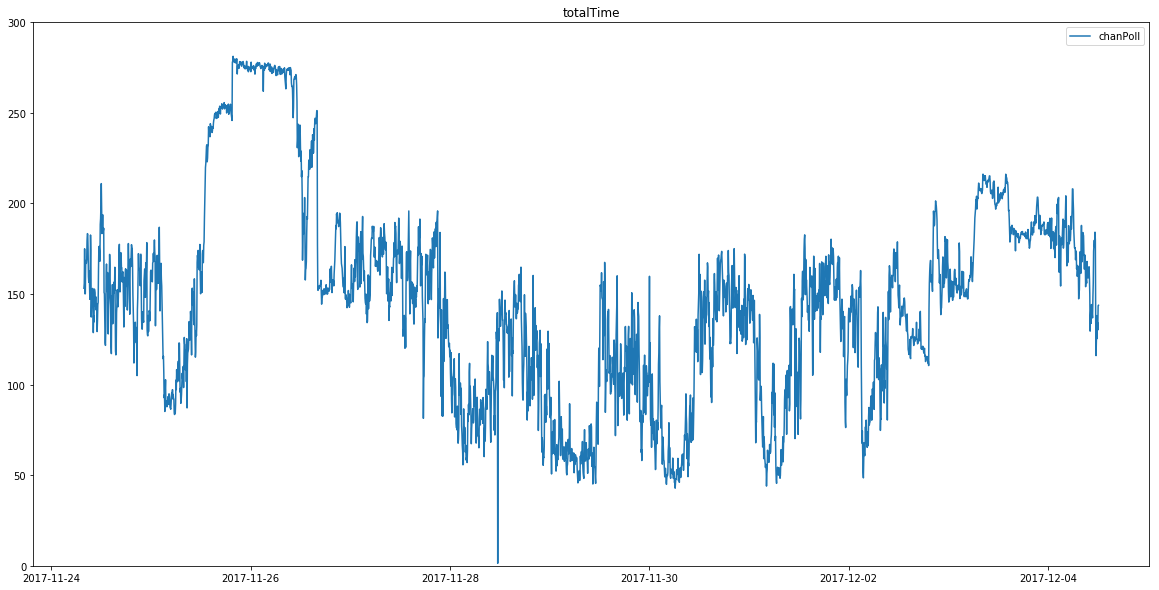

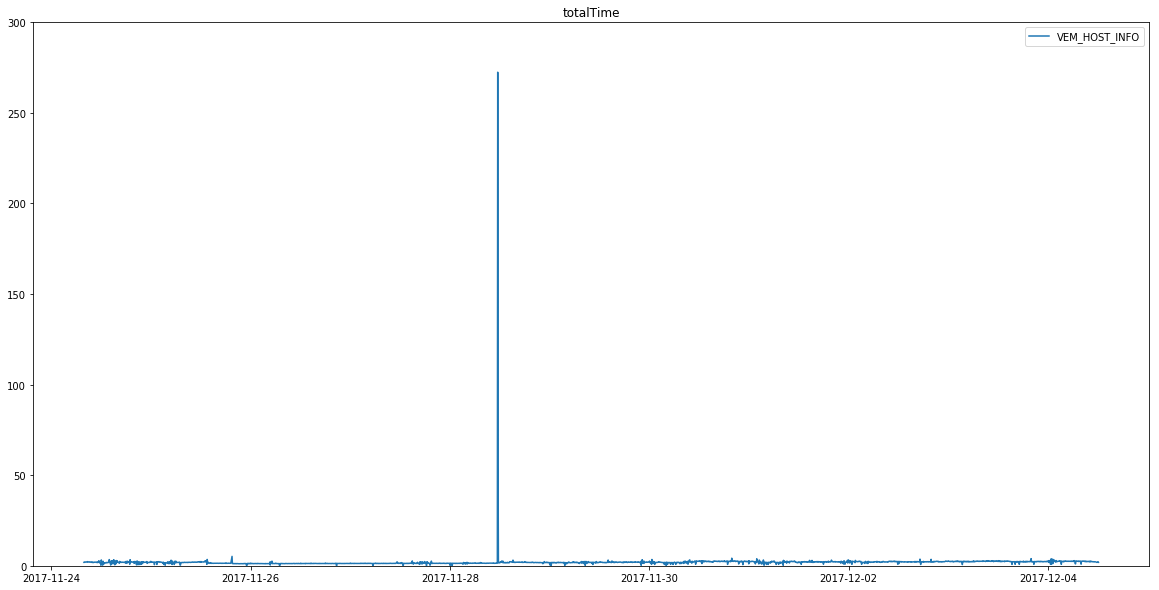

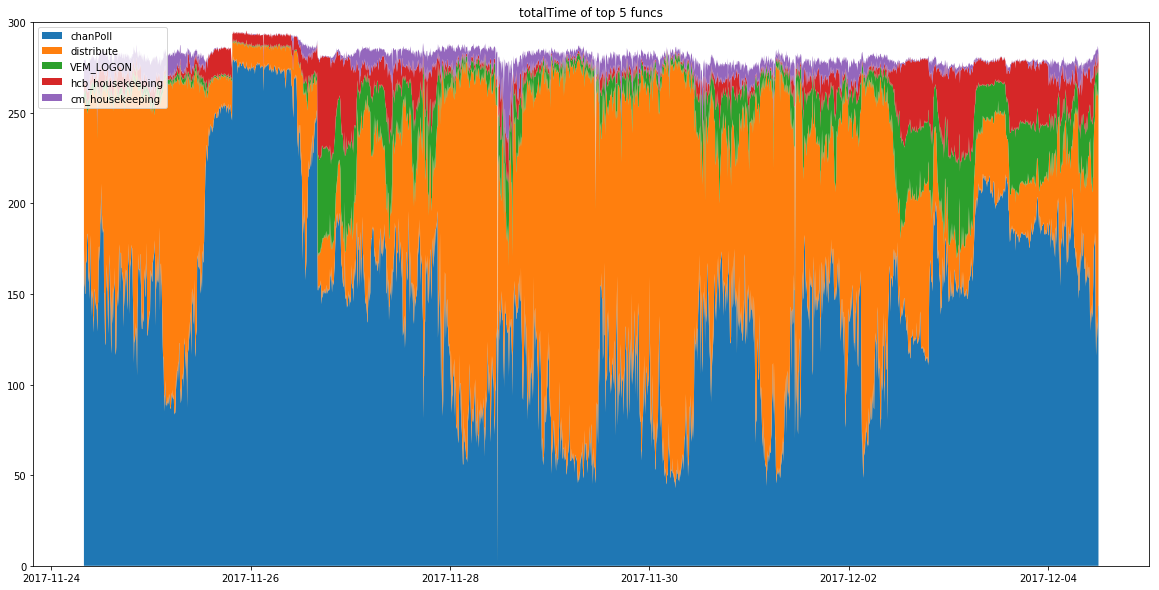

In [1]:
import pandas as pd
import os
import sys #only needed to determine Python version number
import matplotlib #only needed to determine Matplotlib version number
import matplotlib.pyplot as plt
%matplotlib inline

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Location = r'/Users/yudowang/prj/vemkdloganalyze/vemkd.log.ibm'
df=pd.read_table(Location, sep='\n', names=['line'], header=None, error_bad_lines=False)
df.size
df['line']=df['line'].str.replace('<', '').str.replace('>', '').str.replace('[', '').str.replace(']', '')
if os.path.exists('vemkd.csv'):
    os.remove('vemkd.csv')
df[df['line'].str.contains('printPerf')].to_csv('vemkd.csv',index=False,header=False)

col711 = ['Date', 'Time', 'Pid', 'OpCode', 'totalCnt', 'totalTime', 'maxTime', 'minTime', 'totalFileIO', 'maxFileIO', 'minFileIO', 'totalIOCounter', 'totalChanOpenTime', 'maxChanOpenTime', 'minChanOpenTime', 'func']
File = r'vemkd.csv'
df=pd.read_table(File, sep=' ', header=None, names=col711, usecols=[0,1,4,8,10,12,14,16,18,20,22,24,26,28,30,32], error_bad_lines=False, parse_dates=[[0, 1]], index_col=0)

df.head()

date_time_func = df.reset_index().groupby(['func','Date_Time']).sum()
date_time_func.head()
date_time_func.index.levels[0]
date_time_func.index.levels[1]

plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime')
plt.plot(date_time_func.loc['chanPoll']['totalTime'], label='chanPoll')
plt.legend()

is_chanPoll = df['func'] == "chanPoll"
is_totalTimeSmall = df['totalTime'] < 50
df[is_chanPoll & is_totalTimeSmall]['totalTime'][:10]
df[df.index == '2017-11-28 11:29:42'][['totalTime', 'func']].sort_values('totalTime', ascending=False)

plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime')
plt.plot(date_time_func.loc['VEM_HOST_INFO']['totalTime'], label='VEM_HOST_INFO')
plt.legend()

function = df.groupby('func')
function['totalTime'].mean().sort_values(ascending=False).head(5)

function.size()

num = len(function.get_group('chanPoll'))
newdf = function.filter(lambda x: len(x)==num)
newdf.groupby('func').size()
newfunction = newdf.groupby('func')
newfunction['totalTime'].mean().sort_values(ascending=False).head(5)

s = newfunction['totalTime'].mean().sort_values(ascending=False).head(5).index

la = []
for i in range(0, 5):
    la.append(s[i])
    
print la

new_date_time_func = newdf.reset_index().groupby(['func','Date_Time']).sum()

y = []
for x in s:
    y.append(new_date_time_func.loc[x]['totalTime'])
    
plt.figure(figsize=(20,10))
plt.ylim(0, 300)
plt.title('totalTime of top 5 funcs')
x = newfunction.get_group('chanPoll').index
plt.stackplot(x, y, labels=la)
plt.legend(loc='upper left')

In [4]:
df.size

1925434

In [5]:
df

,Pid,OpCode,totalCnt,totalTime,maxTime,minTime,totalFileIO,maxFileIO,minFileIO,totalIOCounter,totalChanOpenTime,maxChanOpenTime,minChanOpenTime,func
Date_Time,,,,,,,,,,,,,,
2017-11-24 07:51:49,30733:139652954498848,0,2,0.000006,0.000003,0.000003,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,VEM_UNAME
2017-11-24 07:51:49,30733:139652954498848,4,19,0.341209,0.065429,0.004429,0.241493,0.059499,0.003108,19,0.0,0.0,0.0,VEM_CLIENT_REGISTER
2017-11-24 07:51:49,30733:139652954498848,6,1,0.008711,0.008711,0.008711,0.004048,0.004048,0.004048,1,0.0,0.0,0.0,VEM_CLIENT_UNREGISTER
2017-11-24 07:51:49,30733:139652954498848,14,5131,0.665947,0.009031,0.000020,0.041461,0.000092,0.000004,5131,0.0,0.0,0.0,VEM_START_CONTAINER
2017-11-24 07:51:49,30733:139652954498848,15,5131,0.037531,0.001163,0.000003,0.011739,0.000197,0.000001,5131,0.0,0.0,0.0,VEM_START_CONTAINER_ACK
2017-11-24 07:51:49,30733:139652954498848,17,92,0.001172,0.000054,0.000003,0.000573,0.000030,0.000000,85,0.0,0.0,0.0,VEM_SIGNAL_CONTAINER_ACK
2017-11-24 07:51:49,30733:139652954498848,18,15,2.224777,0.184834,0.133453,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,VEM_CONTAINER_INFO
2017-11-24 07:51:49,30733:139652954498848,20,10805,0.484072,0.006053,0.000006,0.051979,0.001613,0.000000,15918,0.0,0.0,0.0,VEM_CONTAINER_STATUS_UPDATE
2017-11-24 07:51:49,30733:139652954498848,34,80,0.000323,0.000021,0.000002,0.000000,0.000000,0.000000,0,0.0,0.0,0.0,PEM_SYN_ACK


In [8]:
df.index

DatetimeIndex(['2017-11-24 07:51:49', '2017-11-24 07:51:49',
               '2017-11-24 07:51:49', '2017-11-24 07:51:49',
               '2017-11-24 07:51:49', '2017-11-24 07:51:49',
               '2017-11-24 07:51:49', '2017-11-24 07:51:49',
               '2017-11-24 07:51:49', '2017-11-24 07:51:49',
               ...
               '2017-12-04 12:08:35', '2017-12-04 12:08:35',
               '2017-12-04 12:08:35', '2017-12-04 12:08:35',
               '2017-12-04 12:08:35', '2017-12-04 12:08:35',
               '2017-12-04 12:08:35', '2017-12-04 12:08:35',
               '2017-12-04 12:08:35', '2017-12-04 12:08:35'],
              dtype='datetime64[ns]', name=u'Date_Time', length=137531, freq=None)

In [9]:
len(df)

137531